# Assignment EDA


## Load Dataset and Know About Them

In [35]:
import pandas as pd

# Datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

#Sample Data

transactions.head()


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [36]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [37]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


## 1. PRODUCT PRICE DISTRIBUTION

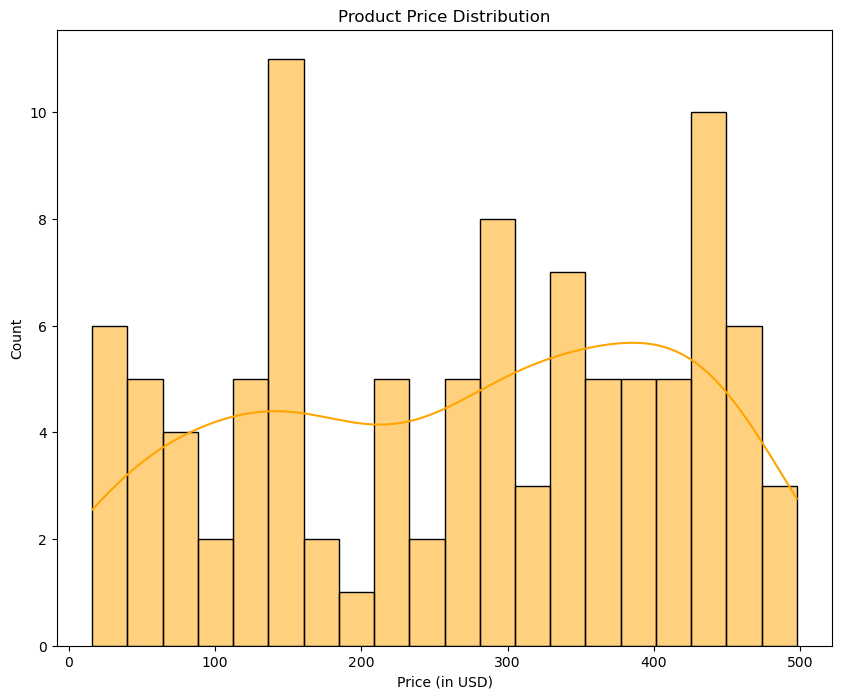

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# figure size
plt.figure(figsize=(10, 8))

# Create a histogram 
sns.histplot(data=products, x='Price', bins=20, kde=True, color='orange')

# Add labels 
plt.title("Product Price Distribution")
plt.xlabel("Price (in USD)")
plt.ylabel("Count")

plt.show()


## 2. TOTAL NO OF UNIQUE PRODUCTS AND TOP 10 

In [83]:
# unique products
total_unique_products = transactions['ProductID'].nunique()
print(f"Total number of unique products: {total_unique_products}")


Total number of unique products: 100


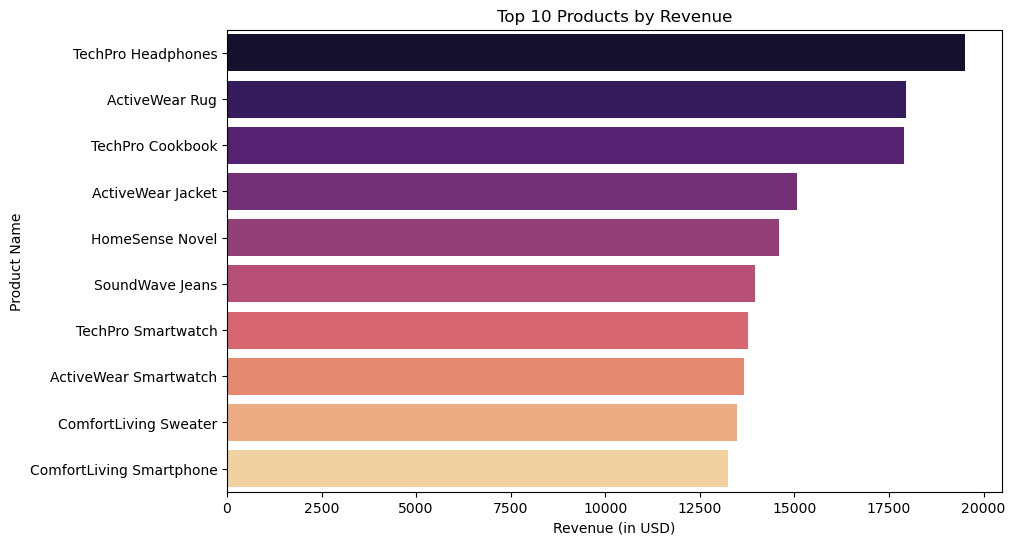

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total revenue per product
product_revenue = transactions.groupby('ProductID')['TotalValue'].sum().reset_index()

product_revenue = product_revenue.merge(products[['ProductID', 'ProductName']], on='ProductID')

# Top 10 by revenue
top_products_by_revenue = product_revenue.sort_values(by='TotalValue', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='TotalValue', y='ProductName', data=top_products_by_revenue, palette='magma')

plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue (in USD)")
plt.ylabel("Product Name")

plt.show()


### - There are total 100 unique products and these are top 10 products by revenue 

## 3. TRANSACTIONS VOLUME OVER TIME

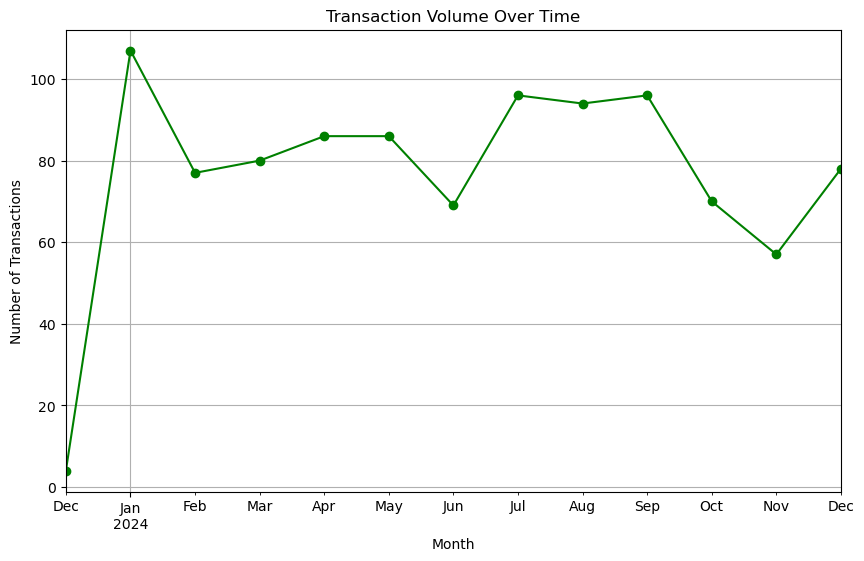

In [86]:
import matplotlib.pyplot as plt
import pandas as pd

#Conversion
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')

#transactions by each month 
monthly_transaction_counts = transactions['YearMonth'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
monthly_transaction_counts.plot(kind='line', marker='o', color='green')

plt.title("Transaction Volume Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.grid()


plt.show()


### -Transaction volume peaked in January and a slight dip in June

## 4. TOP 10 CUSTOMER BY TOTAL SPENDING

In [87]:
# Calculate total unique customers
total_customers = transactions['CustomerID'].nunique()
print(f"Total number of customers: {total_customers}")

Total number of customers: 199


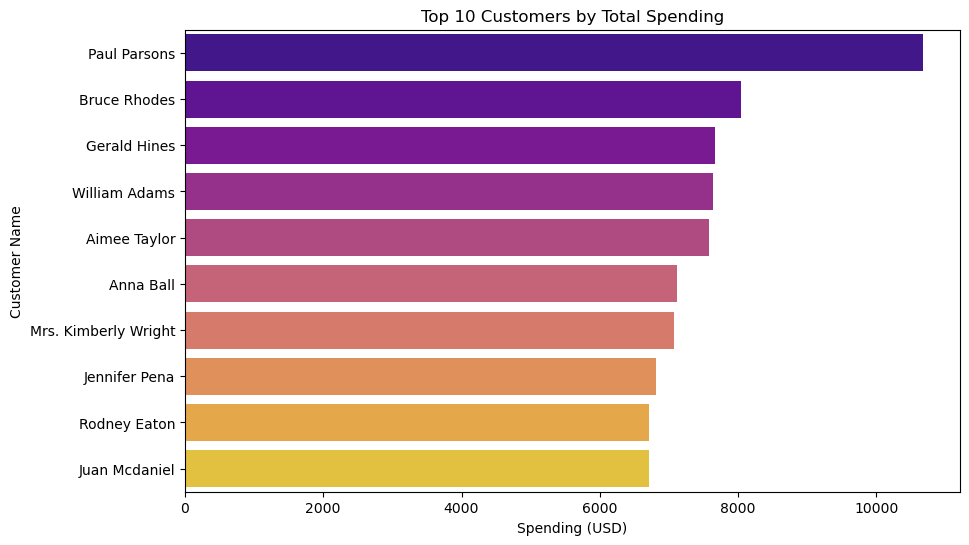

In [88]:
# Total spending per customer
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()

# Top 10 customers by spending
top_customers = customer_spending.sort_values(by='TotalValue', ascending=False).head(10)

# Merge with customer names
top_customers = top_customers.merge(customers[['CustomerID', 'CustomerName']], on='CustomerID')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalValue', y='CustomerName', data=top_customers, palette="plasma")
plt.title("Top 10 Customers by Total Spending")
plt.xlabel("Spending (USD)")
plt.ylabel("Customer Name")
plt.show()


### -There are total 199 unique customers these are top 10 cutsomer names by total spending

## 5.TOTAL QUANTITY PER PRODUCT

In [89]:
# Total number of unique products
total_products = products['ProductID'].nunique()
print(f"Total number of products: {total_products}")

Total number of products: 100


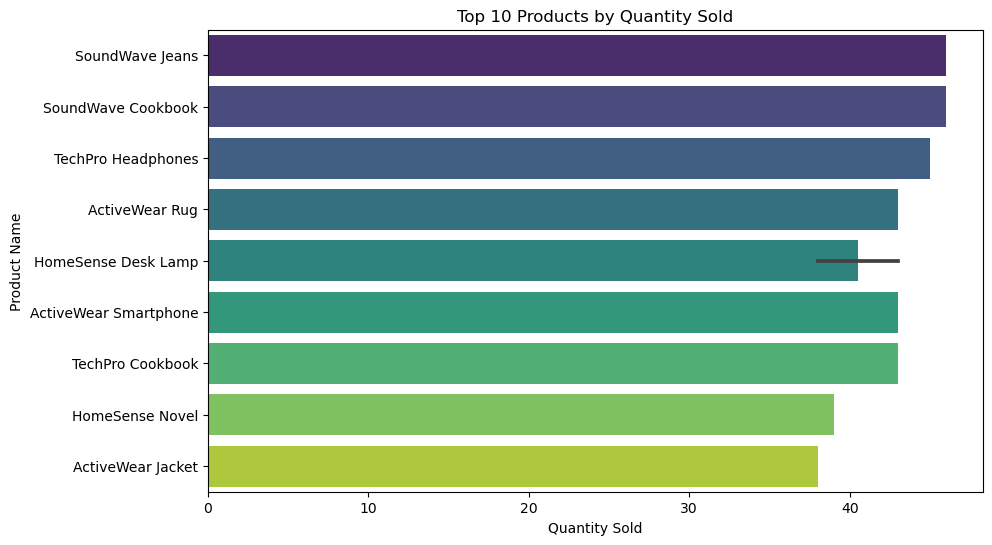

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# total quantity sold per product
quantity_per_product = transactions.groupby('ProductID')['Quantity'].sum().reset_index()

# Merge 
quantity_per_product = quantity_per_product.merge(products[['ProductID', 'ProductName']], on='ProductID')


top_quantity_sold = quantity_per_product.sort_values(by='Quantity', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity', y='ProductName', data=top_quantity_sold, palette='viridis')

plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")

plt.show()


### These are the top 10 products by quantity sold

## 6.MONTHLY REVENUE TRENDS

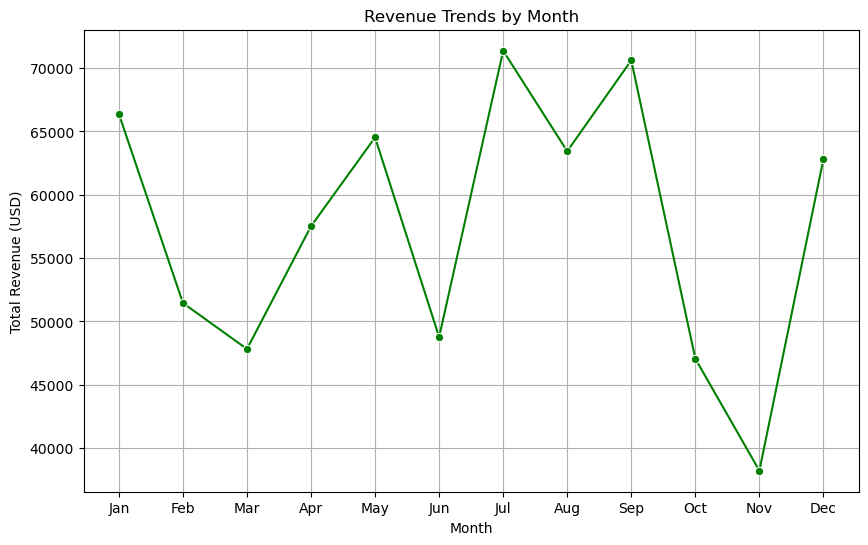

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

transactions['Month'] = transactions['TransactionDate'].dt.month

# the total revenue for each month
monthly_revenue = transactions.groupby('Month')['TotalValue'].sum()

# line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o', color='green')

plt.title("Revenue Trends by Month")
plt.xlabel("Month")
plt.ylabel("Total Revenue (USD)")

# month names
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.grid()
plt.show()


### -Monthly revenue fluctuate with peaks in Jan, Jun and Sep and lows in Feb, Oct and Nov.

## 7. PREFERENCE OF TOP CUSTOMERS

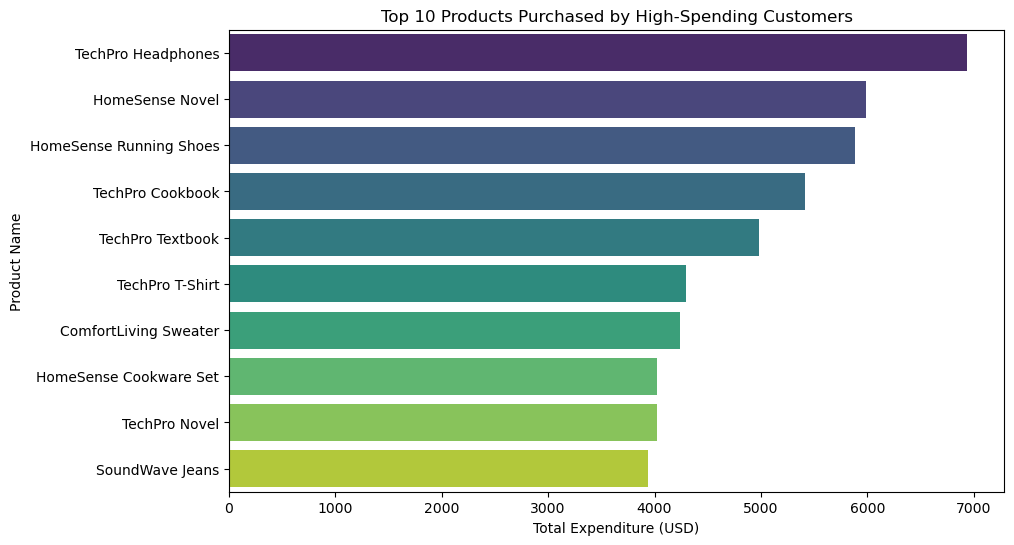

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# total spending of each customer
total_spending_per_customer = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()

# spending threshold 
high_spender_limit = total_spending_per_customer['TotalValue'].quantile(0.9)
high_spending_customers = total_spending_per_customer[total_spending_per_customer['TotalValue'] > high_spender_limit]

high_spending_transactions = transactions[transactions['CustomerID'].isin(high_spending_customers['CustomerID'])]

# which products high spenders prefer based on total spending and quantity
high_spending_preferences = high_spending_transactions.groupby('ProductID').agg(
    Quantity_Sold=('Quantity', 'sum'),
    Total_Expenditure=('TotalValue', 'sum')
).reset_index().merge(products[['ProductID', 'ProductName', 'Category']], on='ProductID')

top_high_spender_products = high_spending_preferences.sort_values(by='Total_Expenditure', ascending=False).head(10)

# Plot 
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Expenditure', y='ProductName', data=top_high_spender_products, palette="viridis")

plt.title("Top 10 Products Purchased by High-Spending Customers")
plt.xlabel("Total Expenditure (USD)")
plt.ylabel("Product Name")

plt.show()


## 8. CHURN ANALYSIS

In [92]:
import pandas as pd

# most recent transaction date for each customer
recent_transaction_date = transactions.groupby('CustomerID')['TransactionDate'].max().reset_index()

customer_data_with_last_transaction = customers.merge(recent_transaction_date, on='CustomerID', how='left')

customer_data_with_last_transaction['DaysSinceLastTransaction'] = (
    transactions['TransactionDate'].max() - customer_data_with_last_transaction['TransactionDate']
).dt.days

# potential churners
potential_churners = customer_data_with_last_transaction[
    customer_data_with_last_transaction['DaysSinceLastTransaction'] > 180
]

print(potential_churners[['CustomerID', 'CustomerName', 'Region', 'DaysSinceLastTransaction']])


    CustomerID       CustomerName         Region  DaysSinceLastTransaction
13       C0014     Deborah Wilcox         Europe                     345.0
19       C0020  Mr. Manuel Conway  North America                     333.0
57       C0058     Zachary Turner  North America                     330.0
72       C0073      Heidi Johnson         Europe                     283.0
79       C0080     David Gonzalez           Asia                     290.0
96       C0097          Tina Ford           Asia                     280.0
109      C0110    Elizabeth Wells           Asia                     360.0
127      C0128        Henry Leach           Asia                     216.0
129      C0130       Robert Jones  South America                     227.0
143      C0144        Andrea Hart  North America                     244.0
149      C0150    Angela Williams  South America                     216.0
181      C0182     Joshua Preston         Europe                     232.0
192      C0193     Dougla